Postive is >1, Neutral is 1 and 0, Negative is <0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
skeptics = pd.read_csv("..\Other files\climateskeptics.csv")
change = pd.read_csv("..\Other files\climatechange.csv")

In [3]:
final_data = pd.DataFrame()
final_data["Subreddit name"] = ""
final_data["Total posts"] = 0
final_data["Posts w/ positive vote number (n)"] = 0
final_data["Posts w/ positive vote number (%)"] = 0
final_data["Posts w/ negative vote number (n)"] = 0
final_data["Posts w/ negative vote number (%)"] = 0
final_data["Posts w/ neutral vote number (n)"] = 0
final_data["Posts w/ neutral vote number (%)"] = 0

In [4]:
posts = 0
ups = 0
downs = 0
neutral = 0
## Skeptics
for i in range(0,skeptics["ups"].count()):
    tempvotes = int(skeptics["ups"].iloc[i])
    posts += 1
    if tempvotes < 0:
        downs += 1
    elif tempvotes > 1:
        ups += 1
    else:
        neutral += 1
final_data = final_data.append({"Subreddit name" : "Skeptics", "Total posts" : posts,\
                                "Posts w/ positive vote number (n)" : ups, "Posts w/ positive vote number (%)" : ups*100/posts,\
                                "Posts w/ negative vote number (n)" : downs, "Posts w/ negative vote number (%)" : downs*100/posts,\
                                "Posts w/ neutral vote number (n)" : neutral, "Posts w/ neutral vote number (%)" : neutral*100/posts,\
                               }, ignore_index=True)

In [5]:
posts = 0
ups = 0
downs = 0
neutral = 0
## Change
for i in range(0,change["ups"].count()):
    tempvotes = change["ups"].iloc[i]
    posts += 1
    if tempvotes < 0:
        downs += 1
    elif tempvotes > 1:
        ups += 1
    else:
        neutral += 1
final_data = final_data.append({"Subreddit name" : "Change", "Total posts" : posts,\
                                "Posts w/ positive vote number (n)" : ups, "Posts w/ positive vote number (%)" : ups*100/posts,\
                                "Posts w/ negative vote number (n)" : downs, "Posts w/ negative vote number (%)" : downs*100/posts,\
                                "Posts w/ neutral vote number (n)" : neutral, "Posts w/ neutral vote number (%)" : neutral*100/posts,\
                               }, ignore_index=True)

In [6]:
final_data

,Subreddit name,Total posts,Posts w/ positive vote number (n),Posts w/ positive vote number (%),Posts w/ negative vote number (n),Posts w/ negative vote number (%),Posts w/ neutral vote number (n),Posts w/ neutral vote number (%)
0,Skeptics,4148,2256,54.387657,563,13.572806,1329,32.039537
1,Change,4148,1290,31.099325,438,10.559306,2420,58.341369


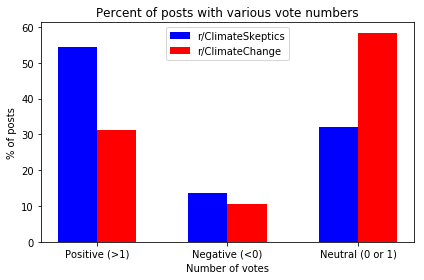

In [7]:
n_groups = 3
values_skeptics = (final_data["Posts w/ positive vote number (%)"].iloc[0],\
                   final_data["Posts w/ negative vote number (%)"].iloc[0],\
                  final_data["Posts w/ neutral vote number (%)"].iloc[0])
values_change = (final_data["Posts w/ positive vote number (%)"].iloc[1],\
                   final_data["Posts w/ negative vote number (%)"].iloc[1],\
                  final_data["Posts w/ neutral vote number (%)"].iloc[1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, values_skeptics, bar_width,
alpha=opacity,
color='b',
label='r/ClimateSkeptics')

rects2 = plt.bar(index + bar_width, values_change, bar_width,
alpha=opacity,
color='r',
label='r/ClimateChange')

plt.xlabel('Number of votes')
plt.ylabel('% of posts')
plt.title('Percent of posts with various vote numbers')
plt.xticks(index + bar_width/2, ('Positive (>1)', 'Negative (<0)', 'Neutral (0 or 1)'))
plt.legend()

plt.tight_layout()
plt.show()